In [266]:
#importing all import libraries
import numpy as np,pandas as pd,matplotlib.pyplot as plt,math as m
from math import cos,sin,pi
import pywt

#### 1 . Generate a real chirp signal. Compute the subband decomposition of this signal upto three levels and plot the approximate and detail components.

chirp signal: 
    A CHRIP is a signal in which the frequency increases (up-chirp) or decreases (down-chirp) with time. In some sources, the term chirp is used interchangeably with sweep signal. It is commonly applied to sonar, radar, and laser systems, and to other applications, such as in spread-spectrum communications.
    
    A linear chirp signal sweeps the frequency from low to high frequency (or vice-versa) linearly. One approach to generate a chirp signal is to concatenate a series of segments of sine waves each with increasing(or decreasing) frequency in order. This method introduces discontinuities in the chirp signal due to the mismatch in the phases of each such segments. Modifying the equation of a sinusoid to generate a chirp signal is a better approach.

In [267]:
A=10
phi=pi/4
f_s=7200
f_0=5
t=np.linspace(0,5,999)
t1=2
f_1=10

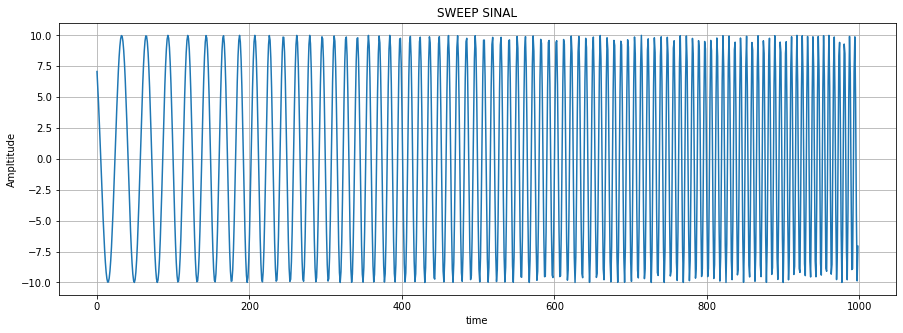

In [268]:
def sweep(Amp,t1,f1,f0,phi):
    sweep=[]
    for i in range(len(t)):
        f_t=((f_1-f_0)*t[i]/t1)+f_0
        sig=A*cos(2*pi*f_t*t[i] +phi)
        sweep.append(sig)
    return sweep


signal=sweep(A,t1,f_1,f_0,phi)
plt.figure(figsize=(15,5))
plt.plot(signal)
plt.title("SWEEP SINAL")
plt.ylabel("Ampltitude")  
plt.xlabel("time")
plt.grid("on")

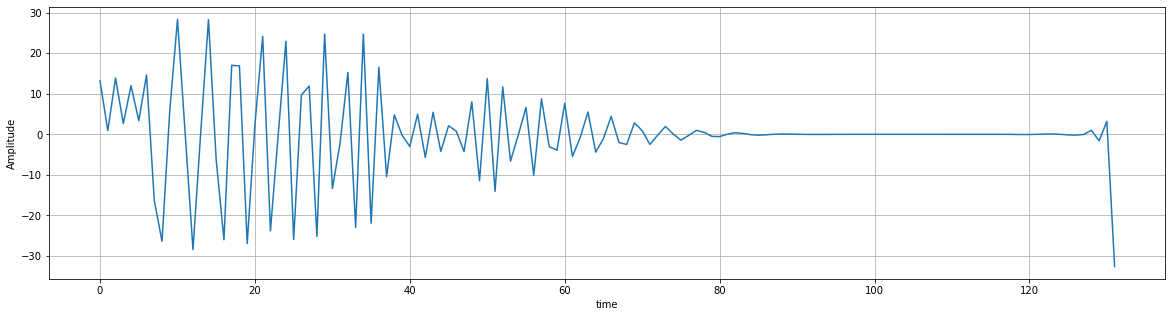

In [269]:
#sub-Band decompsition
#intution=https://www.researchgate.net/publication/236056912_Effect_of_chewing_on_dental_patients_with_total_denture_An_experimental_study/figures?lo=1


#approximate component
levels=3
Approx=pywt.downcoef('a',signal,'db5',level=3,mode="sym")
plt.figure(figsize=(20,5))
plt.plot(Approx)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.grid("Approximate component")

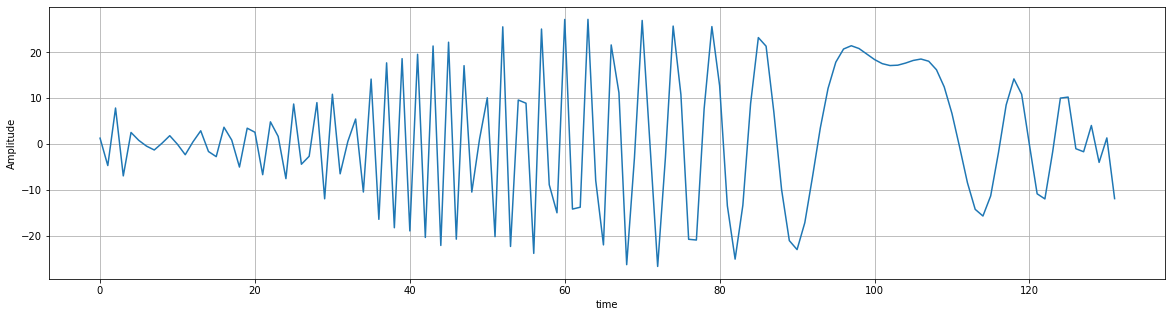

In [270]:
#detailed component
detailed=pywt.downcoef('d',signal,'db5',level=3,mode="sym")
plt.figure(figsize=(20,5))
plt.plot(detailed)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.grid("Detailed component")

# 2

2. Consider the sample HeaviSine signal in PyWavelets library. The signal
is added with AWGN and a noisy signal is generated with SNR of 15 dB.
(a) Perform Wavelet decomposition on this signal.
(b) Use an appropriate thresholding method to denoise the signal.
(c) Reconstruct the signal and compare it with the original signal.

### approximate mathmatical formula

#### sig= 4*sin (d * pi * t )-sign(t-b)-sign(c-t)

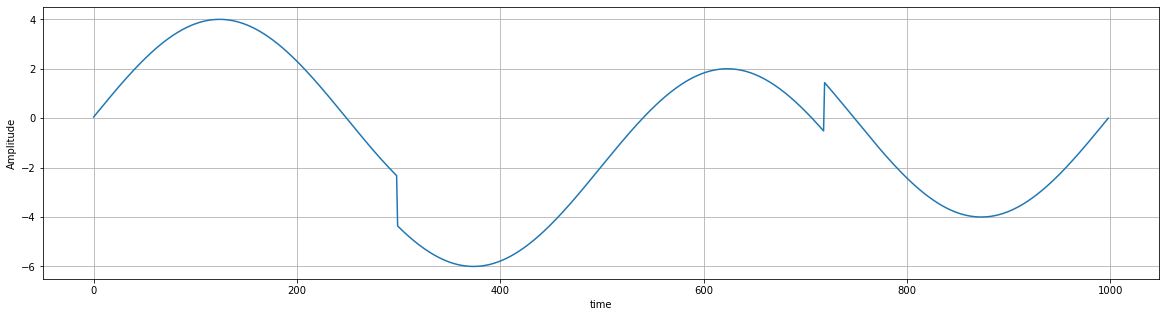

In [271]:
Hsine=pywt.data.demo_signal(name="HeaviSine",n=len(t))
plt.figure(figsize=(20,5))
plt.plot(Hsine)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.grid("on")

the variance is 0.30131800268296044


Text(0.5, 1.0, 'Additive white gaussian noise')

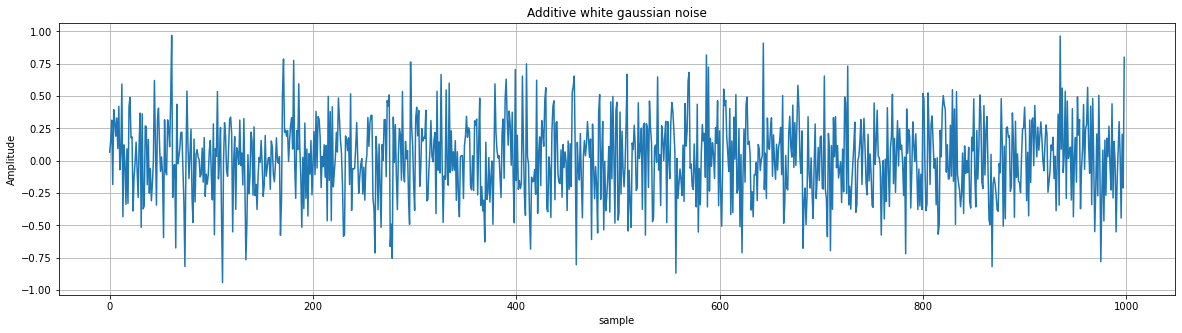

In [272]:
SNR=15
pow_noise=np.sum(Hsine**2)*(10**(-SNR/10))
var=pow_noise/999
print("the variance is",var)

AWGN=np.random.normal(0,var,999)
plt.figure(figsize=(20,5))
plt.plot(AWGN)
plt.xlabel("sample")
plt.ylabel("Amplitude")
plt.grid("on")
plt.title("Additive white gaussian noise")

Text(0.5, 1.0, 'Noisy_signal')

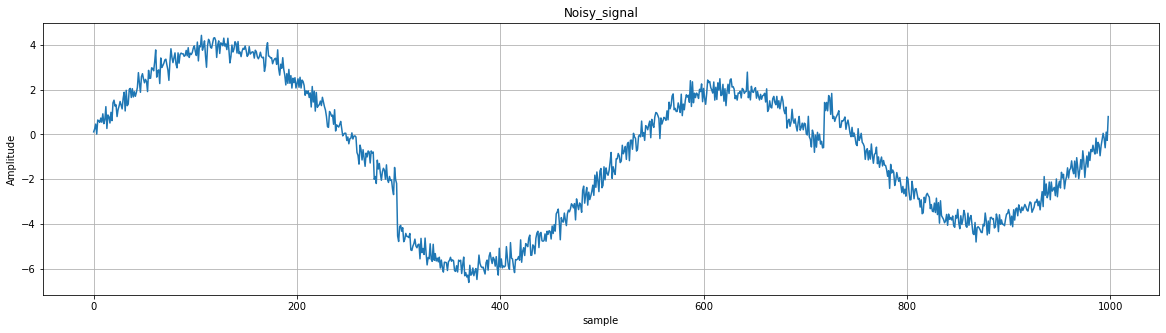

In [273]:
Noisy_sig=Hsine+AWGN
plt.figure(figsize=(20,5))
plt.plot(Noisy_sig)
plt.xlabel("sample")
plt.ylabel("Amplitude")
plt.grid("on")
plt.title("Noisy_signal")

### Wavelet decomposition on this signal

Text(0.5, 0, 'sample(magnitude)')

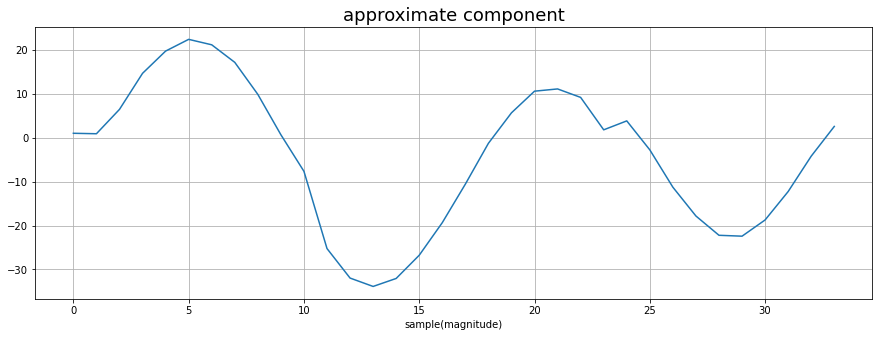

In [274]:
#approximate component
Ac=pywt.downcoef('a',Noisy_sig, 'db2', mode='sym', level=5)
plt.figure(figsize=(15,5))
plt.plot(Ac)
plt.grid("on")
plt.title("approximate component",size=18)
plt.xlabel("sample(time)")
plt.xlabel("sample(magnitude)")

Text(0, 0.5, '(magnitude)')

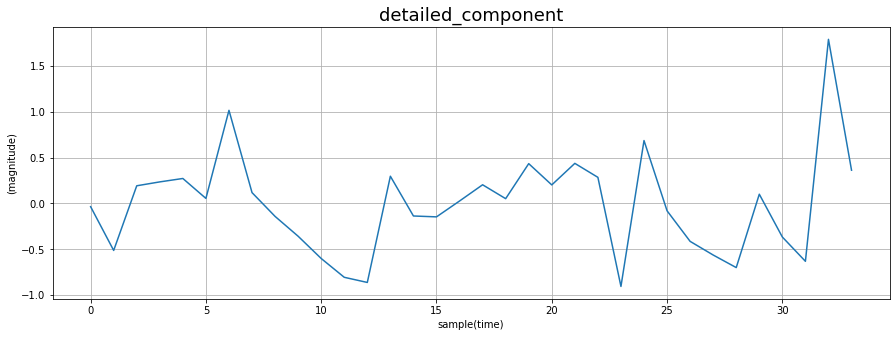

In [275]:
#detailed component
Dc=pywt.downcoef('d',Noisy_sig, 'db2', mode='sym', level=5)
plt.figure(figsize=(15,5))
plt.plot(Dc)
plt.grid("on")
plt.title("detailed_component",size=18)
plt.xlabel("sample(time)")
plt.ylabel("(magnitude)")

### b)  Use an appropriate thresholding method to denoise the signal.

Text(0.5, 0, 'sample(magnitude)')

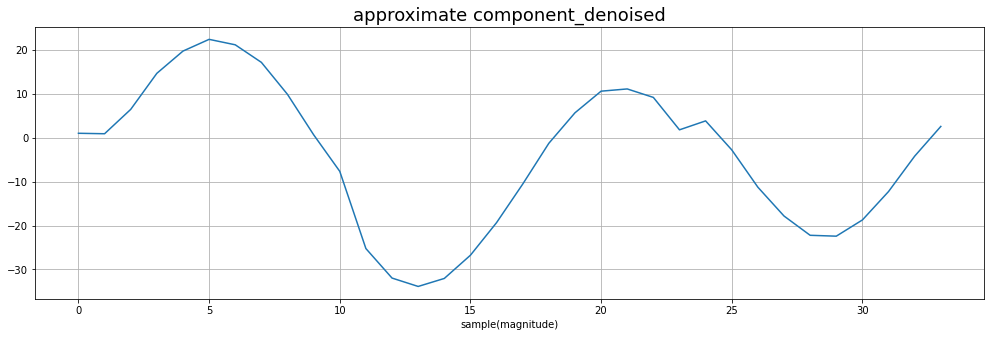

In [295]:
plt.figure(figsize=(17,5))
threshold_Ac = ((np.median(Ac)/0.6745))*(np.sqrt(2*np.log(len(Ac))))
heavisine_denoised_approx = pywt.threshold(Ac,threshold_Ac,mode= 'hard')
plt.plot(heavisine_denoised_approx)
plt.grid("on")
plt.title("approximate component_denoised",size=18)
plt.xlabel("sample(time)")
plt.xlabel("sample(magnitude)")

Text(0.5, 0, 'sample(magnitude)')

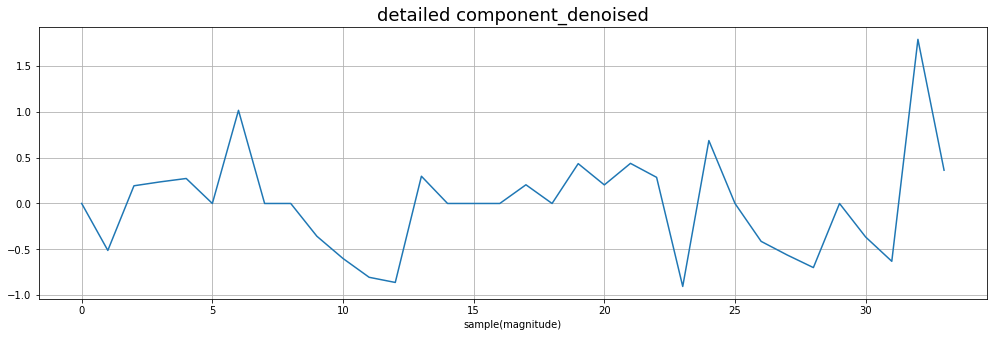

In [296]:
plt.figure(figsize=(17,5))
threshold_Dc = (np.median(Dc)/0.6745)*(np.sqrt(2*np.log(len(Dc))))
heavisine_denoised_detailed = pywt.threshold(Dc,threshold_Dc,mode= 'hard')
plt.plot(heavisine_denoised_detailed)
plt.grid("on")
plt.title("detailed component_denoised",size=18)
plt.xlabel("sample(time)")
plt.xlabel("sample(magnitude)")

### reconstruction of the signal

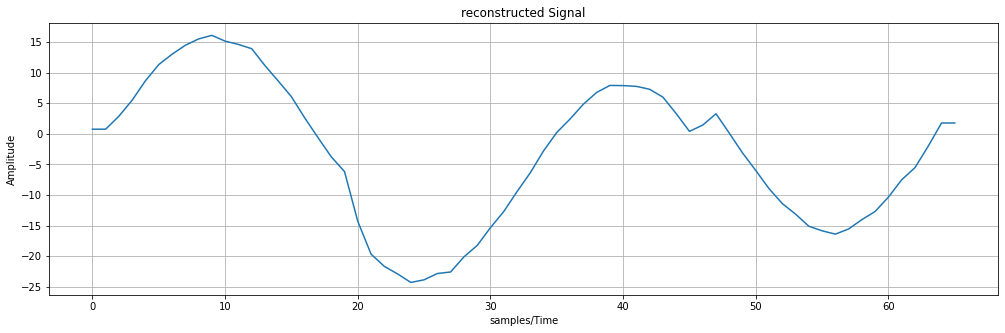

In [313]:
reconstuected_sig= pywt.idwt(heavisine_denoised_approx,heavisine_denoised_detailed ,wavelet='db2',mode='sym', axis = -1)
plt.figure(figsize=(17,5))
plt.plot(reconstuected_sig)
plt.title("reconstructed Signal")
plt.xlabel('samples/Time')
plt.ylabel('Amplitude')
plt.grid("on")

# 3
Download the NASA's Femto Bearing Dataset from here. This is a dataset
containing high frequency sensor data regarding accelerated degradation
of bearings
(a) Deconstruct the signal and smooth it out (remove high frequency
noise) by using a suitable threshold.
(b) Perform the same operation using Moving Average Filter and com-
pare the results.

In [317]:
feature=["feat-1","feat-2","feat-3","feat-4","feat-5","feat-6",]
data=pd.read_csv("acc_01089.csv",names=feature)
data.head()

,feat-1,feat-2,feat-3,feat-4,feat-5,feat-6
0,11,9,20,425040.0,0.065,-0.126
1,11,9,20,425080.0,-0.824,1.213
2,11,9,20,425120.0,-0.197,-0.550
3,11,9,20,425160.0,-0.872,0.266
4,11,9,20,425200.0,0.555,0.933


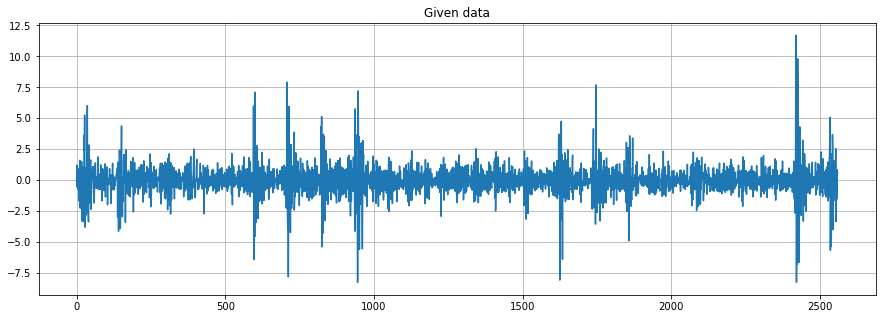

In [326]:
plt.figure(figsize=(15,5))
feat=data["feat-6"]
plt.plot(feat)
plt.title("Given data")
plt.grid('True')
plt.show()

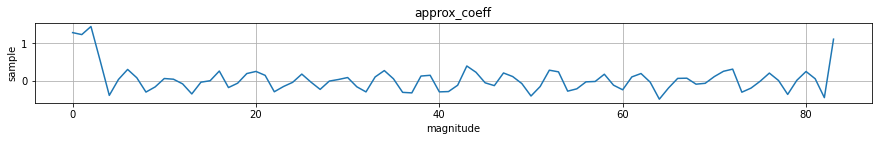

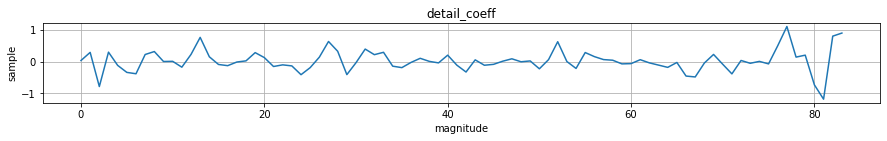

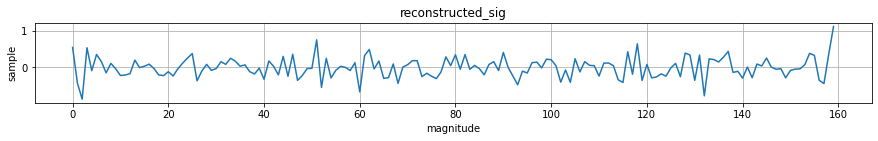

In [344]:

A_c= pywt.downcoef('a',feat, 'db2', mode='sym', level=5)
D_c = pywt.downcoef('d',feat, 'db2', mode='sym', level=5)
sigma_Approx = (np.median(A_c)/0.6745)
A_threshold = sigma_Approx*(np.sqrt(2*np.log(len(A_c))))
A_denoise = pywt.threshold(A_c,A_threshold,mode= 'hard')
sigma_Detail = (np.median(D_c)/0.6745)
D_threshold =sigma_Detail*(np.sqrt(2*np.log(len(D_c))))
D_denoise = pywt.threshold(D_c,D_threshold ,mode="hard")

reconstructed_sig= pywt.idwt(A_denoise,D_denoise, wavelet='db3', mode='symmetric', axis = -1)
coeff=[approx_coeff,detail_coeff,reconstructed_sig]
name=["approx_coeff","detail_coeff","reconstructed_sig"]
for i in range(3):
    plt.figure(figsize=(15,5))
    plt.subplot(3,1,i+1)
    plt.plot(coeff[i])
    plt.title(name[i])
    plt.grid(1)
    plt.xlabel("magnitude")
    plt.ylabel("sample")
    plt.show()


#### 2 MOVING AVERAGE

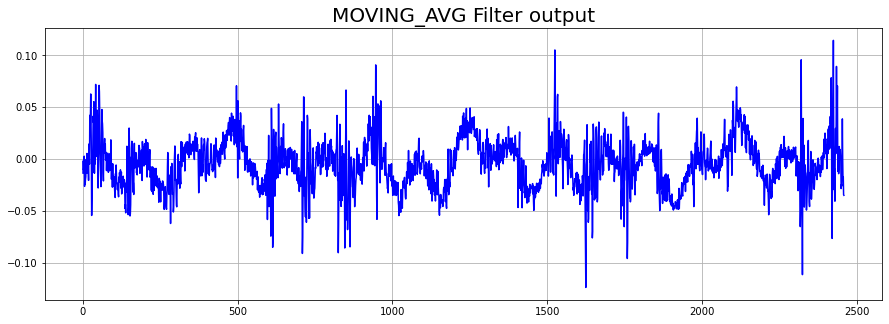

In [354]:
def MOVING_AVG(signal,order):
    out=[]
    for i in range(order,len(signal)):
        x=0
        for j in range(order):
            x=x+(signal[i-j-1])/order
        out.append(x)
    return out
Movingavg=MOVING_AVG(feat,100)
plt.figure(figsize=(15,5))
plt.plot(Movingavg,c='b')
plt.title("MOVING_AVG Filter output",size=20)
plt.grid(1)
plt.show()